In [104]:
%load_ext autoreload
%autoreload 2
import uproot
import numpy as np
import matplotlib.pyplot as plt
import awkward as ak
import sys
sys.path.append("../../analysisTools/")
from analysisTools import Analyzer
from analysisTools import loadSchema
import analysisTools as tools
import analysisSubroutines as routines
import plotTools as ptools
import utils
import importlib
import coffea.util as util
import time
import json
import os
import glob
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Import coffea files

In [105]:
prefix = './coffea/'

In [106]:
# MINIAOD + new x-cleaning + "no cut" for good_vtx
bkg_histo_v7 = util.load(f'{prefix}/background_v7_MINIAOD_NewXclean.coffea')[0]

In [107]:
# MINIAOD + new x-cleaning + new-new xsec (similar to sig v2) + MiniISO + "ID + OSSF" for good_vtx
bkg_histo_v7_1 = util.load(f'{prefix}/background_v7_MINIAOD_NewXclean_default_good_vtx.coffea')[0]

In [108]:
# MINIAOD + new x-cleaning + new-new xsec (similar to sig v2) + MiniISO + "v5" for good_vtx
bkg_histo_v7_2 = util.load(f'{prefix}/background_v7_MINIAOD_NewXclean_v5_good_vtx.coffea')[0]

In [109]:
# MINIAOD + new x-cleaning + MiniISO + "v5" + SR Update with tighter dPhi(MET, leading jet)
bkg_histo_v8 = util.load(f'{prefix}/background_v5_good_vtx_SR_dPhiTight.coffea')[0]

In [110]:
# AOD + old x-cleaning
bkg_files = {
    "QCD": "bkg_2018_QCD_TuneCP5_PSWeights", # No entry for QCD
    "Top": "bkg_2018_Top",
    "DY": "bkg_2018_DY",
    "Diboson": "bkg_2018_Diboson",
    "Triboson": "bkg_2018_Triboson",
    "W+jets": "bkg_2018_WJets",
    "Z+jets": "bkg_2018_ZJets",
}

bkg_histos = {}

for b in bkg_files.keys():
    bkg_histos[b] = util.load(f'{prefix}/{bkg_files[b]}_AOD_OldXclean.coffea')[0]

### Look into coffea output

In [111]:
utils.get_bkg_point_dict(bkg_histo_v7)

,Process
bkg_2018_ZJets_ZJetsNuNu_HT2500toInf,ZJets
bkg_2018_ZJets_ZJetsNuNu_HT800to1200,ZJets
bkg_2018_ZJets_ZJetsNuNu_HT1200to2500,ZJets
bkg_2018_ZJets_ZJetsNuNu_HT600to800,ZJets
bkg_2018_ZJets_ZJetsNuNu_HT100to200,ZJets
bkg_2018_ZJets_ZJetsNuNu_HT400to600,ZJets
bkg_2018_ZJets_ZJetsNuNu_HT200to400,ZJets
bkg_2018_Multiboson_ZZZ,Multiboson
bkg_2018_Multiboson_WZZ,Multiboson
bkg_2018_Multiboson_WWZ,Multiboson


In [112]:
utils.get_bkg_point_dict(bkg_histos, isLegacy = True)

,Process
bkg_2018_QCD_HT700to1000,QCD
bkg_2018_QCD_HT500to700,QCD
bkg_2018_QCD_HT1500to2000,QCD
bkg_2018_QCD_HT1000to1500,QCD
bkg_2018_QCD_HT300to500,QCD
bkg_2018_QCD_HT2000toInf,QCD
bkg_2018_ST_s-channel,Top
bkg_2018_ST_t-channel_antitop,Top
bkg_2018_ST_t-channel_top,Top
bkg_2018_ST_tW_top,Top


In [113]:
utils.get_bkg_list_of_cuts(bkg_histos, isLegacy = True)

['Preselections',
 '0 < n(jet) < 3 & n(good vertex) > 0',
 'computing BDT score',
 'No b-tagged jets',
 'Leading jet |eta| < 2.4',
 'Leading jet pT > 80 GeV',
 'dPhi(MET,leading jet) > 1.5',
 'dPhi(MET,all jets) > 0.75',
 'minDxy(e1, e2) > 0.01',
 'BDT']

In [114]:
utils.get_bkg_list_of_cuts(bkg_histo_v7)

['Preselections',
 '0 < n(jet) < 3 & n(good vertex) > 0',
 'computing BDT score',
 'No b-tagged jets',
 'Leading jet |eta| < 2.4',
 'Leading jet pT > 80 GeV',
 'dPhi(MET,leading jet) > 1.5',
 'dPhi(MET,all jets) > 0.75',
 'minDxy(e1, e2) > 0.01',
 'BDT']

In [115]:
utils.get_bkg_list_of_cuts(bkg_histo_v8)

['Preselections',
 '0 < n(jet) < 3 & n(good vertex) > 0',
 'computing BDT score',
 'No b-tagged jets',
 'Leading jet |eta| < 2.4',
 'Leading jet pT > 80 GeV',
 'dPhi(MET,leading jet) > 2',
 'dPhi(MET,all jets) > 0.75',
 'minDxy(e1, e2) > 0.01',
 'BDT']

### Efficiency

In [116]:
pd.options.display.float_format = '{:,.8f}'.format

In [117]:
df_cutflow_legacy = utils.get_bkg_cutflow_df(bkg_histos, 'cutflow', isLegacy = True)
df_cutflow_legacy

,Preselections,0 < n(jet) < 3 & n(good vertex) > 0,computing BDT score,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 1.5","dPhi(MET,all jets) > 0.75","minDxy(e1, e2) > 0.01",BDT
QCD,0.00000177,0.00000009,0.00000009,0.00000006,0.00000006,0.00000006,0.00000006,0.00000003,0.00000001,0.00000000
Top,0.00012947,0.00001277,0.00001277,0.00000799,0.00000717,0.00000715,0.00000715,0.00000672,0.00000079,0.00000000
DY,0.00001126,0.00000184,0.00000184,0.00000181,0.00000181,0.00000181,0.00000181,0.00000168,0.00000136,0.00000000
Diboson,0.00063730,0.00004435,0.00004435,0.00003273,0.00003073,0.00003043,0.00003030,0.00002728,0.00000523,0.00000000
Triboson,0.00193257,0.00015769,0.00015769,0.00010408,0.00009154,0.00009138,0.00009123,0.00007610,0.00001467,0.00000000
W+jets,0.00230996,0.00017293,0.00017293,0.00013873,0.00013153,0.00013127,0.00013122,0.00011391,0.00001950,0.00000009
Z+jets,0.00664534,0.00039832,0.00039832,0.00032510,0.00030958,0.00030900,0.00030896,0.00029235,0.00007296,0.00000011
Total,0.00001878,0.00000133,0.00000133,0.00000108,0.00000103,0.00000103,0.00000103,0.00000090,0.00000024,0.00000000


In [118]:
df_cutflow_v7 = utils.get_bkg_cutflow_df(bkg_histo_v7, 'cutflow', isLegacy = False)
df_cutflow_v7

,Preselections,0 < n(jet) < 3 & n(good vertex) > 0,computing BDT score,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 1.5","dPhi(MET,all jets) > 0.75","minDxy(e1, e2) > 0.01",BDT
ZJets,0.00134318,0.00134318,0.00134318,0.00107512,0.00104633,0.00104102,0.00103988,0.00096826,0.00017428,0.00000072
Multiboson,0.00030946,0.00030946,0.00030946,0.00022131,0.00021035,0.00019991,0.00019746,0.00018350,0.00001662,0.00000012
QCD,0.00000044,0.00000044,0.00000044,0.00000022,0.00000021,0.00000021,0.00000020,0.00000001,0.00000000,0.00000000
DY,0.00000589,0.00000589,0.00000589,0.00000436,0.00000420,0.00000418,0.00000418,0.00000356,0.00000042,0.00000004
Top,0.00009061,0.00009061,0.00009061,0.00005382,0.00004950,0.00004755,0.00004729,0.00004374,0.00000547,0.00000025
WJets,0.00053264,0.00053264,0.00053264,0.00041423,0.00040258,0.00040006,0.00039930,0.00036330,0.00003397,0.00000032
Total,0.00000631,0.00000631,0.00000631,0.00000477,0.00000463,0.00000460,0.00000458,0.00000402,0.00000046,0.00000000


In [119]:
df_cutflow_v7_1 = utils.get_bkg_cutflow_df(bkg_histo_v7_1, 'cutflow', isLegacy = False)
df_cutflow_v7_1

,Preselections,0 < n(jet) < 3 & n(good vertex) > 0,computing BDT score,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 1.5","dPhi(MET,all jets) > 0.75","minDxy(e1, e2) > 0.01",BDT
ZJets,0.00134318,0.00031479,0.00031479,0.00025678,0.00024331,0.00024083,0.00024043,0.00022710,0.00005658,0.00000028
Multiboson,0.00030946,0.00011472,0.00011472,0.00008664,0.00008002,0.00007266,0.00007123,0.00006786,0.00000644,0.00000012
QCD,0.00000044,0.00000007,0.00000007,0.00000004,0.00000004,0.00000004,0.00000003,0.00000000,0.00000000,0.00000000
DY,0.00000589,0.00000265,0.00000265,0.00000212,0.00000201,0.00000201,0.00000201,0.00000184,0.00000013,0.00000002
Top,0.00009061,0.00003898,0.00003898,0.00002421,0.00002177,0.00002027,0.00002023,0.00001913,0.00000250,0.00000011
WJets,0.00053264,0.00015517,0.00015517,0.00012545,0.00011993,0.00011881,0.00011851,0.00011048,0.00001283,0.00000012
Total,0.00000631,0.00000175,0.00000175,0.00000138,0.00000132,0.00000130,0.00000129,0.00000118,0.00000017,0.00000000


In [120]:
df_cutflow_v7_2 = utils.get_bkg_cutflow_df(bkg_histo_v7_2, 'cutflow', isLegacy = False)
df_cutflow_v7_2

,Preselections,0 < n(jet) < 3 & n(good vertex) > 0,computing BDT score,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 1.5","dPhi(MET,all jets) > 0.75","minDxy(e1, e2) > 0.01",BDT
ZJets,0.00134318,0.00001834,0.00001834,0.00001523,0.00001454,0.00001448,0.00001447,0.00001370,0.00001370,0.00000020
Multiboson,0.00030946,0.00000270,0.00000270,0.00000184,0.00000165,0.00000159,0.00000155,0.00000151,0.00000151,0.00000006
QCD,0.00000044,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
DY,0.00000589,0.00000009,0.00000009,0.00000008,0.00000007,0.00000007,0.00000007,0.00000007,0.00000007,0.00000002
Top,0.00009061,0.00000151,0.00000151,0.00000114,0.00000103,0.00000096,0.00000096,0.00000076,0.00000076,0.00000010
WJets,0.00053264,0.00000391,0.00000391,0.00000317,0.00000306,0.00000305,0.00000304,0.00000280,0.00000280,0.00000007
Total,0.00000631,0.00000006,0.00000006,0.00000004,0.00000004,0.00000004,0.00000004,0.00000004,0.00000004,0.00000000


In [121]:
df_cutflow_cts_v7_2 = utils.get_bkg_cutflow_df(bkg_histo_v7_2, 'cutflow_cts', isLegacy = False)
df_cutflow_cts_v7_2

,Preselections,0 < n(jet) < 3 & n(good vertex) > 0,computing BDT score,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 1.5","dPhi(MET,all jets) > 0.75","minDxy(e1, e2) > 0.01",BDT
ZJets,"28,746.12977562",392.57500734,392.57500734,325.98210682,311.19685040,309.95717780,309.67914239,293.23671185,293.23671185,4.29141406
Multiboson,"2,156.81396999",18.83247615,18.83247615,12.80602825,11.47723302,11.06203995,10.77107739,10.50394111,10.50394111,0.41519307
QCD,"9,553.01159515",80.77369827,80.77369827,0.46854573,0.46854573,0.46854573,0.46854573,0.00000000,0.00000000,0.00000000
DY,"1,895.28729556",30.40567854,30.40567854,27.02726981,23.64886109,23.64886109,23.64886109,23.64886109,23.64886109,6.75681745
Top,"3,966.40218368",66.31630137,66.31630137,49.97759000,45.01409458,41.86630745,41.84946568,33.09668115,33.09668115,4.35173209
WJets,"93,278.65545906",684.49020289,684.49020289,555.78253983,535.70119750,533.59213686,533.09393139,490.37861826,490.37861826,12.06921990
Total,"139,596.30027905","1,273.39336456","1,273.39336456",972.04408044,927.50678232,920.59506888,919.51102366,850.86481346,850.86481346,27.88437658


In [122]:
df_cutflow_raw_v7_2 = utils.get_bkg_cutflow_df(bkg_histo_v7_2, 'cutflow_nevts', isLegacy = False)
df_cutflow_raw_v7_2

,Preselections,0 < n(jet) < 3 & n(good vertex) > 0,computing BDT score,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 1.5","dPhi(MET,all jets) > 0.75","minDxy(e1, e2) > 0.01",BDT
ZJets,255365,2964,2964,2328,2252,2243,2233,1970,1970,34
Multiboson,10204,94,94,64,58,56,55,53,53,2
QCD,3422,21,21,2,2,2,2,0,0,0
DY,561,9,9,8,7,7,7,7,7,2
Top,25887,358,358,249,192,188,187,166,166,25
WJets,331197,2107,2107,1583,1531,1525,1522,1334,1334,36
Total,626636,5553,5553,4234,4042,4021,4006,3530,3530,99


In [123]:
df_cutflow_v8 = utils.get_bkg_cutflow_df(bkg_histo_v8, 'cutflow', isLegacy = False)
df_cutflow_v8

,Preselections,0 < n(jet) < 3 & n(good vertex) > 0,computing BDT score,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 2","dPhi(MET,all jets) > 0.75","minDxy(e1, e2) > 0.01",BDT
ZJets,0.00134318,0.00001834,0.00001834,0.00001523,0.00001454,0.00001448,0.00001444,0.00001367,0.00001367,0.00000020
Multiboson,0.00030946,0.00000270,0.00000270,0.00000184,0.00000165,0.00000159,0.00000155,0.00000151,0.00000151,0.00000006
QCD,0.00000044,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
DY,0.00000589,0.00000009,0.00000009,0.00000008,0.00000007,0.00000007,0.00000007,0.00000007,0.00000007,0.00000002
Top,0.00009061,0.00000151,0.00000151,0.00000114,0.00000103,0.00000096,0.00000096,0.00000076,0.00000076,0.00000010
WJets,0.00053264,0.00000391,0.00000391,0.00000317,0.00000306,0.00000305,0.00000304,0.00000280,0.00000280,0.00000007
Total,0.00000631,0.00000006,0.00000006,0.00000004,0.00000004,0.00000004,0.00000004,0.00000004,0.00000004,0.00000000


In [124]:
df_cutflow_cts_v8 = utils.get_bkg_cutflow_df(bkg_histo_v8, 'cutflow_cts', isLegacy = False)
df_cutflow_cts_v8

,Preselections,0 < n(jet) < 3 & n(good vertex) > 0,computing BDT score,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 2","dPhi(MET,all jets) > 0.75","minDxy(e1, e2) > 0.01",BDT
ZJets,"28,746.12977562",392.57500734,392.57500734,325.98210682,311.19685040,309.95717780,309.03777317,292.59534263,292.59534263,4.29141406
Multiboson,"2,156.81396999",18.83247615,18.83247615,12.80602825,11.47723302,11.06203995,10.77107739,10.50394111,10.50394111,0.41519307
QCD,"9,553.01159515",80.77369827,80.77369827,0.46854573,0.46854573,0.46854573,0.46854573,0.00000000,0.00000000,0.00000000
DY,"1,895.28729556",30.40567854,30.40567854,27.02726981,23.64886109,23.64886109,23.64886109,23.64886109,23.64886109,6.75681745
Top,"3,966.40218368",66.31630137,66.31630137,49.97759000,45.01409458,41.86630745,41.84946568,33.09668115,33.09668115,4.35173209
WJets,"93,278.65545906",684.49020289,684.49020289,555.78253983,535.70119750,533.59213686,532.69578536,489.98047223,489.98047223,12.06921990
Total,"139,596.30027905","1,273.39336456","1,273.39336456",972.04408044,927.50678232,920.59506888,918.47150841,849.82529821,849.82529821,27.88437658


In [125]:
pd.options.display.float_format = '{:,.2f}'.format

In [126]:
utils.get_bkg_cutflow_df(bkg_histo_v7_2, 'cutflow_cts', isLegacy = False)

,Preselections,0 < n(jet) < 3 & n(good vertex) > 0,computing BDT score,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 1.5","dPhi(MET,all jets) > 0.75","minDxy(e1, e2) > 0.01",BDT
ZJets,"28,746.13",392.58,392.58,325.98,311.20,309.96,309.68,293.24,293.24,4.29
Multiboson,"2,156.81",18.83,18.83,12.81,11.48,11.06,10.77,10.50,10.50,0.42
QCD,"9,553.01",80.77,80.77,0.47,0.47,0.47,0.47,0.00,0.00,0.00
DY,"1,895.29",30.41,30.41,27.03,23.65,23.65,23.65,23.65,23.65,6.76
Top,"3,966.40",66.32,66.32,49.98,45.01,41.87,41.85,33.10,33.10,4.35
WJets,"93,278.66",684.49,684.49,555.78,535.70,533.59,533.09,490.38,490.38,12.07
Total,"139,596.30","1,273.39","1,273.39",972.04,927.51,920.60,919.51,850.86,850.86,27.88


In [127]:
utils.get_bkg_cutflow_df(bkg_histo_v8, 'cutflow_cts', isLegacy = False)

,Preselections,0 < n(jet) < 3 & n(good vertex) > 0,computing BDT score,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 2","dPhi(MET,all jets) > 0.75","minDxy(e1, e2) > 0.01",BDT
ZJets,"28,746.13",392.58,392.58,325.98,311.20,309.96,309.04,292.60,292.60,4.29
Multiboson,"2,156.81",18.83,18.83,12.81,11.48,11.06,10.77,10.50,10.50,0.42
QCD,"9,553.01",80.77,80.77,0.47,0.47,0.47,0.47,0.00,0.00,0.00
DY,"1,895.29",30.41,30.41,27.03,23.65,23.65,23.65,23.65,23.65,6.76
Top,"3,966.40",66.32,66.32,49.98,45.01,41.87,41.85,33.10,33.10,4.35
WJets,"93,278.66",684.49,684.49,555.78,535.70,533.59,532.70,489.98,489.98,12.07
Total,"139,596.30","1,273.39","1,273.39",972.04,927.51,920.60,918.47,849.83,849.83,27.88


In [21]:
df_cutflow_raw_legacy = utils.get_bkg_cutflow_df(bkg_histos, 'cutflow_nevts', isLegacy = True)
df_cutflow_raw_legacy

,Preselections,0 < n(jet) < 3 & n(good vertex) > 0,computing BDT score,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 1.5","dPhi(MET,all jets) > 0.75","minDxy(e1, e2) > 0.01",BDT
QCD,12311,381,381,160,159,159,158,3,2,0
Top,49818,4688,4688,3058,2348,2337,2336,2006,353,0
DY,205,14,14,12,12,12,12,10,3,0
Diboson,18067,1234,1234,915,860,852,848,767,149,0
Triboson,2257,170,170,116,106,105,104,92,13,0
W+jets,697657,48425,48425,37015,35472,35415,35377,29090,4981,30
Z+jets,1281459,67427,67427,52627,50986,50934,50903,44480,11198,19
Total,2061774,122339,122339,93903,89943,89814,89738,76448,16699,49


In [22]:
df_cutflow_raw_v7 = utils.get_bkg_cutflow_df(bkg_histo_v7, 'cutflow_nevts', isLegacy = False)
df_cutflow_raw_v7

,Preselections,0 < n(jet) < 3 & n(good vertex) > 0,computing BDT score,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 1.5","dPhi(MET,all jets) > 0.75","minDxy(e1, e2) > 0.01",BDT
ZJets,255365,255365,255365,193316,190006,189185,188435,159469,26521,127
Multiboson,10204,10204,10204,7250,6885,6449,6339,5880,535,4
QCD,3422,3422,3422,1107,1102,1102,1036,34,4,0
DY,561,561,561,415,400,398,398,339,40,4
Top,25887,25887,25887,15762,13231,13051,13009,11505,1324,50
WJets,331197,331197,331197,231218,226587,225694,224694,189418,16380,160
Total,626636,626636,626636,449068,438211,435879,433911,366645,44804,345


In [23]:
df_cutflow_raw_v7_1 = utils.get_bkg_cutflow_df(bkg_histo_v7_1, 'cutflow_nevts', isLegacy = False)
df_cutflow_raw_v7_1

,Preselections,0 < n(jet) < 3 & n(good vertex) > 0,computing BDT score,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 1.5","dPhi(MET,all jets) > 0.75","minDxy(e1, e2) > 0.01",BDT
ZJets,255365,52708,52708,41121,39698,39308,39035,34097,8510,46
Multiboson,10204,4015,4015,2999,2764,2441,2363,2230,209,4
QCD,3422,403,403,160,158,158,140,10,3,0
DY,561,252,252,202,191,191,191,175,12,2
Top,25887,9926,9926,6559,5196,5083,5065,4652,644,34
WJets,331197,87101,87101,65479,63345,62907,62507,55373,6224,62
Total,626636,154405,154405,116520,111352,110088,109301,96537,15602,148


In [24]:
df_cutflow_raw_v7_2 = utils.get_bkg_cutflow_df(bkg_histo_v7_2, 'cutflow_nevts', isLegacy = False)
df_cutflow_raw_v7_2

,Preselections,0 < n(jet) < 3 & n(good vertex) > 0,computing BDT score,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 1.5","dPhi(MET,all jets) > 0.75","minDxy(e1, e2) > 0.01",BDT
ZJets,255365,2964,2964,2328,2252,2243,2233,1970,1970,34
Multiboson,10204,94,94,64,58,56,55,53,53,2
QCD,3422,21,21,2,2,2,2,0,0,0
DY,561,9,9,8,7,7,7,7,7,2
Top,25887,358,358,249,192,188,187,166,166,25
WJets,331197,2107,2107,1583,1531,1525,1522,1334,1334,36
Total,626636,5553,5553,4234,4042,4021,4006,3530,3530,99


In [25]:
df_cutflow_raw_v8 = utils.get_bkg_cutflow_df(bkg_histo_v8, 'cutflow_nevts', isLegacy = False)
df_cutflow_raw_v8

,Preselections,0 < n(jet) < 3 & n(good vertex) > 0,computing BDT score,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 2","dPhi(MET,all jets) > 0.75","minDxy(e1, e2) > 0.01",BDT
ZJets,255365,2964,2964,2328,2252,2243,2216,1953,1953,34
Multiboson,10204,94,94,64,58,56,55,53,53,2
QCD,3422,21,21,2,2,2,2,0,0,0
DY,561,9,9,8,7,7,7,7,7,2
Top,25887,358,358,249,192,188,187,166,166,25
WJets,331197,2107,2107,1583,1531,1525,1511,1323,1323,36
Total,626636,5553,5553,4234,4042,4021,3978,3502,3502,99


In [26]:
def plot_bkg_efficiency(bkg_histos, df, isLegacy, label = 'default', processes = 'all', doLog = True, ylabel = '', title = ''):
    if processes == 'all':
        processes = df.index.values.tolist()
    cuts = utils.get_bkg_list_of_cuts(bkg_histos, isLegacy = isLegacy)
    print(cuts)

    '''
    # Color map for each process
    # cmap = mpl.colormaps['Set3'].colors
    # cmap = ["#5790fc", "#f89c20", "#e42536", "#964a8b", "#9c9ca1", "#7a21dd"] # cms-recommended for 6-color scheme
    cmap = ["#3f90da", "#ffa90e", "#bd1f01", "#94a4a2", "#832db6", "#a96b59", "#e76300", "#b9ac70", "#717581", "#92dadd"] # cms-recommended
    
    colors = { 'W+jets': cmap[0],
               'Z+jets': cmap[1],
               'QCD': cmap[2],
               'DY': cmap[3],
               'Top': cmap[4],
               'TTJetsDiLept': cmap[5],
               'Diboson': cmap[6],
               'Triboson': cmap[7],
               'Total': cmap[8]
    }
    '''
    for process in processes:
        if label != 'default':
            labels = label
        else:
            labels = process
        #plt.plot(cuts, df.loc[process], label=labels, color = colors[process])
        plt.plot(cuts, df.loc[process], label=labels)

    plt.grid()

    if doLog:
        plt.yscale('log')
    
    plt.ylabel(ylabel)
    plt.title(title)
    
    plt.xticks(ticks = np.arange(len(cuts)), labels = cuts, rotation = 45, ha = 'right')
    
    plt.legend()

In [27]:
def plot_signal_efficiency(sig_histo, df, m1s, deltas, ctaus, label, doLog = True, ylabel = '', title = ''):
    cuts = utils.get_signal_list_of_cuts(sig_histo)

    m1_list = []
    for point in df.index.values:
        sig_dict = ptools.signalPoint(point)
        m1 = int(sig_dict['m1'])
        m1_list.append(m1)

    df['m1'] = m1_list
    df = df.sort_values(by=['m1']) # sort by m1
    df.pop('m1')
        
    for point in df.index.values:
        sig_dict = ptools.signalPoint(point)
        m1 = int(sig_dict['m1'])
        delta = sig_dict['delta']
        dmchi = sig_dict['dmchi']
        ctau = int(sig_dict['ctau'])
        
        if (m1 in m1s) and (delta in deltas):
            if ctau in ctaus:
                plt.plot(cuts, df.loc[point], label=label)

    plt.grid()

    if doLog:
        plt.yscale('log')
    
    plt.ylabel(ylabel)
    plt.title(title)
    
    plt.xticks(ticks = np.arange(len(cuts)), labels = cuts, rotation = 45, ha = 'right')
    
    plt.legend()

['Preselections', '0 < n(jet) < 3 & n(good vertex) > 0', 'computing BDT score', 'No b-tagged jets', 'Leading jet |eta| < 2.4', 'Leading jet pT > 80 GeV', 'dPhi(MET,leading jet) > 1.5', 'dPhi(MET,all jets) > 0.75', 'minDxy(e1, e2) > 0.01', 'BDT']
['Preselections', '0 < n(jet) < 3 & n(good vertex) > 0', 'computing BDT score', 'No b-tagged jets', 'Leading jet |eta| < 2.4', 'Leading jet pT > 80 GeV', 'dPhi(MET,leading jet) > 1.5', 'dPhi(MET,all jets) > 0.75', 'minDxy(e1, e2) > 0.01', 'BDT']
['Preselections', '0 < n(jet) < 3 & n(good vertex) > 0', 'computing BDT score', 'No b-tagged jets', 'Leading jet |eta| < 2.4', 'Leading jet pT > 80 GeV', 'dPhi(MET,leading jet) > 1.5', 'dPhi(MET,all jets) > 0.75', 'minDxy(e1, e2) > 0.01', 'BDT']


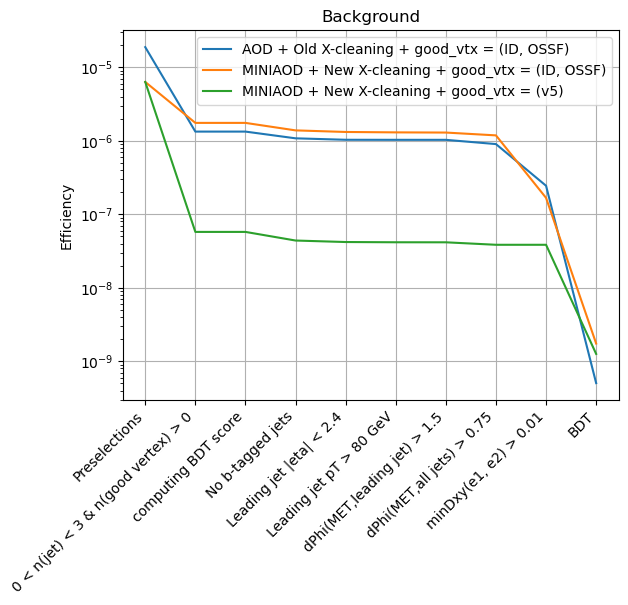

In [28]:
title = 'Background'
ylabel = 'Efficiency'

processes = ['Total']

plot_bkg_efficiency(bkg_histos, df_cutflow_legacy, processes = processes, label = 'AOD + Old X-cleaning + good_vtx = (ID, OSSF)', isLegacy = True, doLog = True, ylabel = ylabel, title = title)
#plot_bkg_efficiency(bkg_histo_v7, df_cutflow_v7, processes = processes, label = 'MINIAOD + New X-cleaning', isLegacy = False, doLog = True, ylabel = ylabel, title = title)
plot_bkg_efficiency(bkg_histo_v7_1, df_cutflow_v7_1, processes = processes, label = 'MINIAOD + New X-cleaning + good_vtx = (ID, OSSF)', isLegacy = False, doLog = True, ylabel = ylabel, title = title)
plot_bkg_efficiency(bkg_histo_v7_2, df_cutflow_v7_2, processes = processes, label = 'MINIAOD + New X-cleaning + good_vtx = (v5)', isLegacy = False, doLog = True, ylabel = ylabel, title = title)

['Preselections', '0 < n(jet) < 3 & n(good vertex) > 0', 'computing BDT score', 'No b-tagged jets', 'Leading jet |eta| < 2.4', 'Leading jet pT > 80 GeV', 'dPhi(MET,leading jet) > 2', 'dPhi(MET,all jets) > 0.75', 'minDxy(e1, e2) > 0.01', 'BDT']


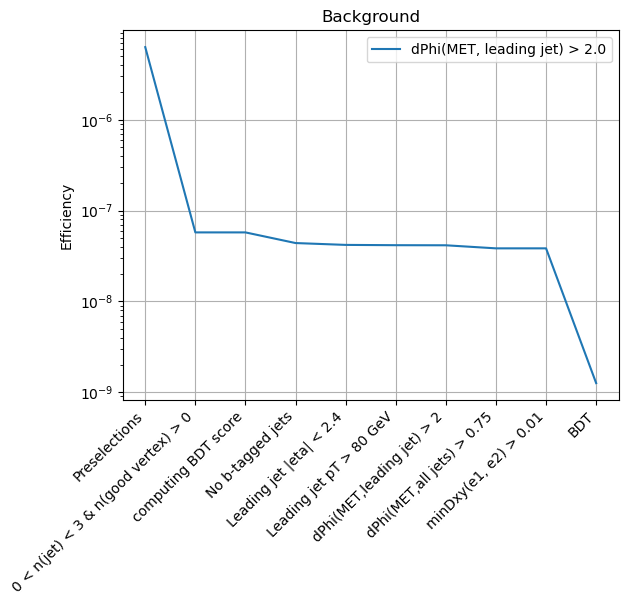

In [39]:
title = 'Background'
ylabel = 'Efficiency'

processes = ['Total']

plot_bkg_efficiency(bkg_histo_v8, df_cutflow_v8, processes = processes, label = 'dPhi(MET, leading jet) > 2.0', isLegacy = False, doLog = True, ylabel = ylabel, title = title)
#plot_bkg_efficiency(bkg_histo_v7_2, df_cutflow_v7_2, processes = processes, label = 'dPhi(MET, leading jet) > 1.5', isLegacy = False, doLog = True, ylabel = ylabel, title = title)


['Preselections', '0 < n(jet) < 3 & n(good vertex) > 0', 'computing BDT score', 'No b-tagged jets', 'Leading jet |eta| < 2.4', 'Leading jet pT > 80 GeV', 'dPhi(MET,leading jet) > 1.5', 'dPhi(MET,all jets) > 0.75', 'minDxy(e1, e2) > 0.01', 'BDT']


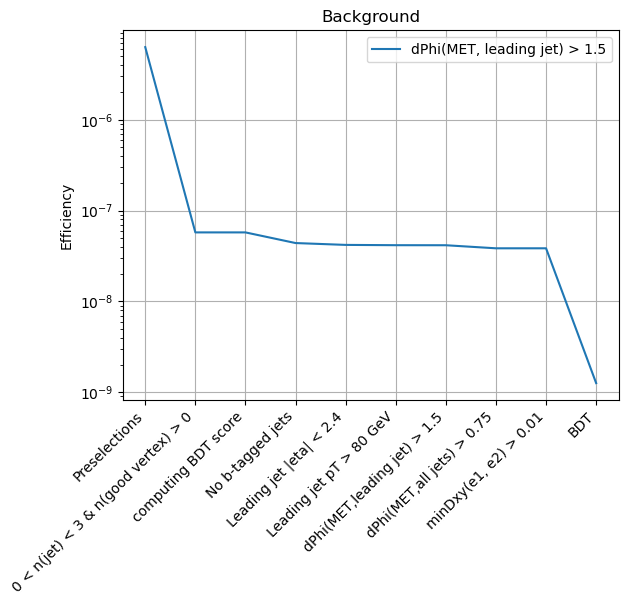

In [40]:
title = 'Background'
ylabel = 'Efficiency'

processes = ['Total']

#plot_bkg_efficiency(bkg_histo_v8, df_cutflow_v8, processes = processes, label = 'dPhi(MET, leading jet) > 2.0', isLegacy = False, doLog = True, ylabel = ylabel, title = title)
plot_bkg_efficiency(bkg_histo_v7_2, df_cutflow_v7_2, processes = processes, label = 'dPhi(MET, leading jet) > 1.5', isLegacy = False, doLog = True, ylabel = ylabel, title = title)


In [47]:
utils.get_bkg_cutflow_df(bkg_histo_v8, 'cutflow').iloc[:, 6]

ZJets        0.00001444
Multiboson   0.00000155
QCD          0.00000000
DY           0.00000007
Top          0.00000096
WJets        0.00000304
Total        0.00000004
Name: dPhi(MET,leading jet) > 2, dtype: float64

In [58]:
list(utils.get_bkg_cutflow_df(bkg_histo_v7_2, 'cutflow').iloc[:, 6].keys())

['ZJets', 'Multiboson', 'QCD', 'DY', 'Top', 'WJets', 'Total']

In [75]:
def get_df(bkg_histo, cut_idx = 6):
    df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow')

    df = pd.DataFrame(df.iloc[:, cut_idx]).iloc[:,0]
    
    return df

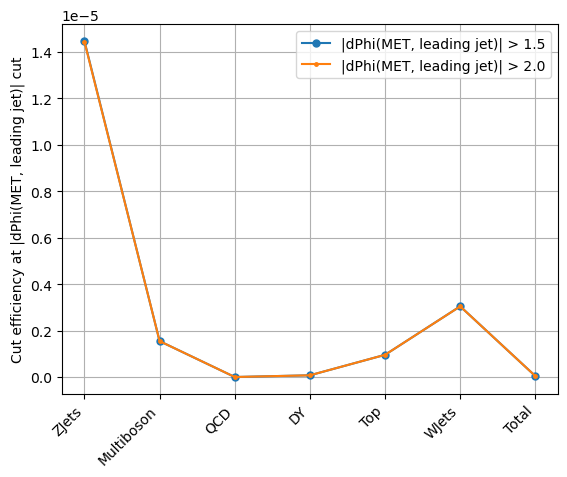

In [76]:
df_v7_2 = get_df(bkg_histo_v7_2)
df_v8 = get_df(bkg_histo_v8)

process = df_v7_2.keys()

plt.plot(range(len(process)), list(df_v7_2), '-o', label='|dPhi(MET, leading jet)| > 1.5', markersize = 5)
plt.plot(range(len(process)), list(df_v8), '-o', label='|dPhi(MET, leading jet)| > 2.0', markersize = 2.5)

plt.ylabel('Cut efficiency at |dPhi(MET, leading jet)| cut')

plt.legend()

plt.xticks(ticks = np.arange(len(process)), labels = process, rotation = 45, ha = 'right')

plt.grid()